In [1]:
import pandas as pd
from CompareGroupsFunctions import *
import matplotlib.pyplot as plt
import seaborn as sns

ano = '2019'
gp_feat = 'CLASSE'
gp_name = 'classe'
gp_map = {'alta': '2+ MW',
          'média': '1/2-2 MW',
          'baixa': '0-1/2 MW'
          }
comp = 'LC'

df_grupo = pd.read_csv("../Data/Processed/ENEM"+str(ano)+"/All_grupos.csv")
nu_grupo = df_grupo['NU_INSCRICAO'].tolist()

## 1. Item Characteristic Curves

In [2]:
lc_comp = GroupComparator(comp=comp, ano=ano, gp_feat=gp_feat, gp_name=gp_name, gp_map=gp_map)
df_gp = lc_comp.get_df_gp()

item_ing = ['Item 55166', 'Item 54110', 'Item 23564', 'Item 31954', 'Item 118180']
item_esp = ['Item 96705', 'Item 118222','Item 39016', 'Item 118167', 'Item 48558']

df_gp_ing = {}
df_gp_esp = {}
df_gp_pt = {}

for g in df_gp.keys():
    df_gp_ing[g] = df_gp[g][df_gp[g]['TP_LINGUA']==0][['NU_INSCRICAO','NU_NOTA_LC']].copy()
    df_gp_esp[g] = df_gp[g][df_gp[g]['TP_LINGUA']==1][['NU_INSCRICAO','NU_NOTA_LC']].copy()
    df_gp_pt[g] = df_gp[g][['NU_INSCRICAO','NU_NOTA_LC']].copy()
    
    for col in df_gp[list(df_gp.keys())[0]].columns:
        if col in item_ing:
            df_gp_ing[g][col] = df_gp[g][df_gp[g]['TP_LINGUA']==0][col]
        elif col in item_esp:
            df_gp_esp[g][col] = df_gp[g][df_gp[g]['TP_LINGUA']==1][col]
        elif col!='NU_INSCRICAO' and col!='NU_NOTA_LC' and col!='TP_LINGUA':
            df_gp_pt[g][col] = df_gp[g][col]
    

In [3]:
print("Total de participantes em inglês:")
for g in df_gp.keys():
    if g=='Geral':
        print(f"{g}: {df_gp_pt[g].shape[0]}")
    else:
        print(f"{lc_comp.gp_map[g]}: {df_gp_pt[g].shape[0]}")

Total de participantes em inglês:
2+ MW: 99632
1/2-2 MW: 404411
0-1/2 MW: 694977
Geral: 1199020


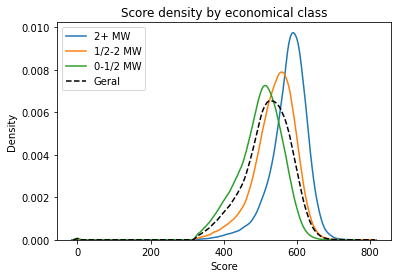

<Figure size 432x288 with 0 Axes>

In [4]:
for g in df_gp.keys():
    if g=='Geral':
        fig = sns.kdeplot(df_gp_pt[g]["NU_NOTA_LC"], label=g, linestyle="--", color='k')
    else:
        fig = sns.kdeplot(df_gp_pt[g]["NU_NOTA_LC"], label=lc_comp.gp_map[g])

plt.xlabel('Score')
plt.title('Score density by economical class')
plt.legend(loc='upper left')
plt.show()
plt.savefig('ScoreDensity-LC2019.png')

### 1.1 English

In [5]:
print("Total de participantes em inglês:")
for g in df_gp.keys():
    if g=='Geral':
        print(f"{g}: {df_gp_ing[g].shape[0]}")
    else:
        print(f"{lc_comp.gp_map[g]}: {df_gp_ing[g].shape[0]}")

Total de participantes em inglês:
2+ MW: 83409
1/2-2 MW: 259454
0-1/2 MW: 305442
Geral: 648305


In [6]:
print("Proporção de participantes em inglês:")
for g in df_gp.keys():
    if g=='Geral':
        print(f"{g}: {1-df_gp[g].mean()['TP_LINGUA']:.3f}")
    else:
        print(f"{lc_comp.gp_map[g]}: {1-df_gp[g].mean()['TP_LINGUA']:.3f}")

Proporção de participantes em inglês:
2+ MW: 0.837
1/2-2 MW: 0.642
0-1/2 MW: 0.439
Geral: 0.541


In [7]:
lc_comp_ing = GroupComparator(comp=comp, ano=ano, gp_feat=gp_feat, gp_name=gp_name, gp_map=gp_map)
lc_comp_ing.df_gp = df_gp_ing
lc_comp_ing.print_mean_std()

Média e Std por classe:
2+ MW - Média: 584.33;   Std: 47.53
1/2-2 MW - Média: 549.46;   Std: 54.91
0-1/2 MW - Média: 510.72;   Std: 61.30
Geral - Média: 535.69;   Std: 62.79


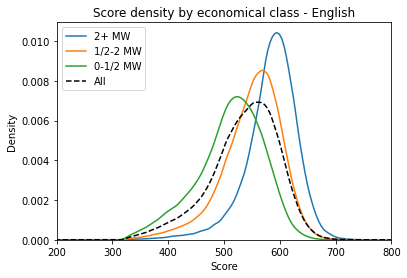

In [8]:
for g in df_gp.keys():
    if g=='Geral':
        fig = sns.kdeplot(df_gp_ing[g]["NU_NOTA_LC"], label='All', linestyle="--", color='k')
    else:
        fig = sns.kdeplot(df_gp_ing[g]["NU_NOTA_LC"], label=lc_comp.gp_map[g])

plt.xlim(200, 800)
plt.xlabel('Score')
plt.title('Score density by economical class - English')
plt.legend(loc='upper left')
#plt.show()
plt.savefig('ScoreDensity-LC2019-English.png')

In [9]:
bin_lc_ing = lc_comp_ing.bin_scores(nota_min=350, nota_max=750, step=20)
auc_lc_ing = lc_comp_ing.auc_groups()
sorted_auc_dif_lc_ing = lc_comp_ing.sort_abs_auc_dif()

Item 55166     0.039215
Item 31954     0.048640
Item 54110     0.086810
Item 23564     0.119148
Item 118180    0.175313
dtype: float64


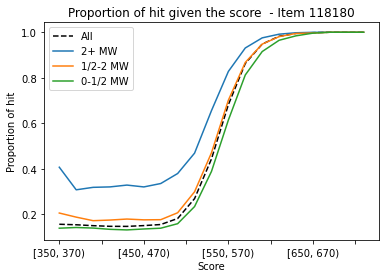

In [10]:
lc_comp_ing.plot_item_compar(item = 'Item 118180')

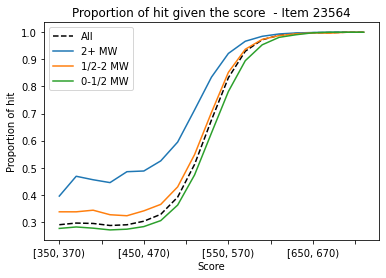

In [11]:
lc_comp_ing.plot_item_compar(item = 'Item 23564')

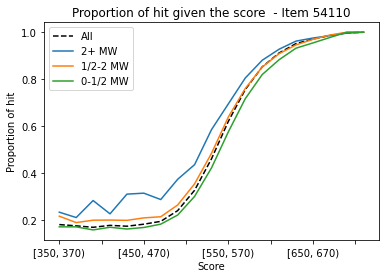

In [12]:
lc_comp_ing.plot_item_compar(item = 'Item 54110')

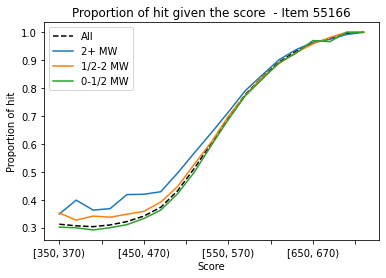

In [13]:
lc_comp_ing.plot_item_compar(item = 'Item 55166')

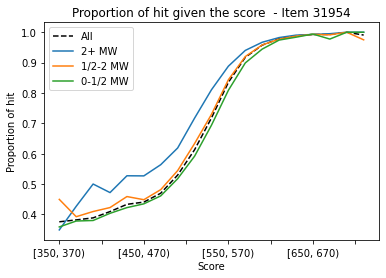

In [14]:
lc_comp_ing.plot_item_compar(item = 'Item 31954')

### 1.2 Espanhol

In [15]:
print("Total de participantes em espanhol:")
for g in df_gp.keys():
    if g=='Geral':
        print(f"{g}: {df_gp[g][df_gp[g]['TP_LINGUA']==1].shape[0]}")
    else:
        print(f"{lc_comp.gp_map[g]}: {df_gp[g][df_gp[g]['TP_LINGUA']==1].shape[0]}")

Total de participantes em espanhol:
2+ MW: 16223
1/2-2 MW: 144957
0-1/2 MW: 389535
Geral: 550715


In [16]:
print("Proporção de participantes em espanhol:")
for g in df_gp.keys():
    if g=='Geral':
        print(f"{g}: {df_gp[g].mean()['TP_LINGUA']:.3f}")
    else:
        print(f"{lc_comp.gp_map[g]}: {df_gp[g].mean()['TP_LINGUA']:.3f}")

Proporção de participantes em espanhol:
2+ MW: 0.163
1/2-2 MW: 0.358
0-1/2 MW: 0.561
Geral: 0.459


In [17]:
lc_comp_esp = GroupComparator(comp=comp, ano=ano, gp_feat=gp_feat, gp_name=gp_name, gp_map=gp_map)
lc_comp_esp.df_gp = df_gp_esp
lc_comp_esp.print_mean_std()

Média e Std por classe:
2+ MW - Média: 543.10;   Std: 55.17
1/2-2 MW - Média: 521.43;   Std: 56.09
0-1/2 MW - Média: 490.43;   Std: 59.61
Geral - Média: 500.14;   Std: 60.59


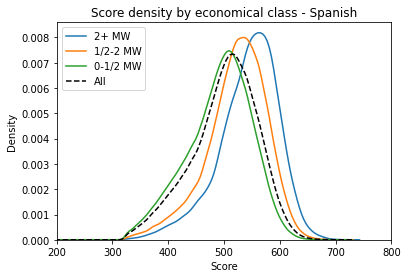

In [18]:
for g in df_gp.keys():
    if g=='Geral':
        fig = sns.kdeplot(df_gp_esp[g]["NU_NOTA_LC"], label='All', linestyle="--", color='k')
    else:
        fig = sns.kdeplot(df_gp_esp[g]["NU_NOTA_LC"], label=lc_comp.gp_map[g])

plt.xlim(200, 800)
plt.xlabel('Score')
plt.title('Score density by economical class - Spanish')
plt.legend(loc='upper left')
#plt.show()
plt.savefig('ScoreDensity-LC2019-Spanish.png')

In [19]:
bin_lc_esp = lc_comp_esp.bin_scores(nota_min=350, nota_max=750)
auc_lc_esp = lc_comp_esp.auc_groups()
sorted_auc_dif_lc_esp = lc_comp_esp.sort_abs_auc_dif()

Item 118167    0.010651
Item 118222    0.023501
Item 48558     0.024004
Item 39016     0.034591
Item 96705     0.047613
dtype: float64


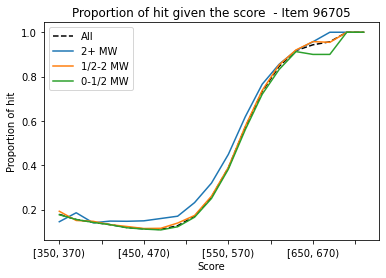

In [20]:
lc_comp_esp.plot_item_compar(item = 'Item 96705')

### 1.3 Português

In [21]:
lc_comp_pt = GroupComparator(comp=comp, ano=ano, gp_feat=gp_feat, gp_name=gp_name, gp_map=gp_map)
lc_comp_pt.df_gp = df_gp_pt
lc_comp_pt.print_mean_std()

Média e Std por classe:
2+ MW - Média: 577.62;   Std: 51.17
1/2-2 MW - Média: 539.41;   Std: 56.95
0-1/2 MW - Média: 499.35;   Std: 61.19
Geral - Média: 519.36;   Std: 64.28


In [22]:
bin_lc_pt = lc_comp_pt.bin_scores(nota_min=350, nota_max=750)
auc_lc_pt = lc_comp_pt.auc_groups()
sorted_auc_dif_lc_pt = lc_comp_pt.sort_abs_auc_dif()

Item 86496     0.004812
Item 96525     0.005186
Item 59976     0.007097
Item 23833     0.009344
Item 118147    0.013759
Item 32261     0.014332
Item 89874     0.015331
Item 118134    0.016219
Item 118235    0.016982
Item 77356     0.017176
Item 118118    0.017413
Item 118165    0.017642
Item 118161    0.018429
Item 86932     0.018662
Item 118117    0.018989
Item 24785     0.019795
Item 118276    0.020823
Item 118207    0.023145
Item 118306    0.027359
Item 14169     0.027603
Item 89550     0.028943
Item 118264    0.031336
Item 118174    0.039604
Item 118299    0.040862
Item 76167     0.042040
Item 118278    0.043416
Item 118028    0.044421
Item 90165     0.044705
Item 118103    0.047211
Item 89317     0.050624
Item 68624     0.051840
Item 86563     0.052991
Item 118215    0.055850
Item 118170    0.063485
Item 118260    0.073435
Item 118256    0.076610
Item 81992     0.078699
Item 118246    0.100990
Item 118232    0.108894
Item 118192    0.147905
dtype: float64


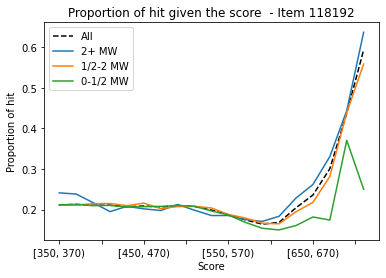

In [23]:
lc_comp_pt.plot_item_compar(item = 'Item 118192')

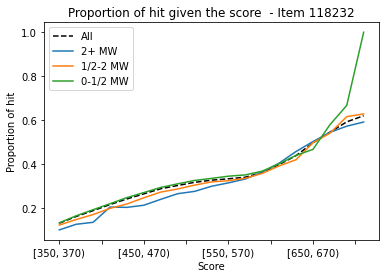

In [24]:
lc_comp_pt.plot_item_compar(item = 'Item 118232')

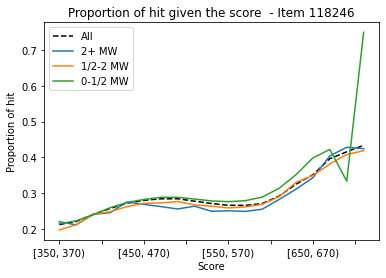

In [25]:
lc_comp_pt.plot_item_compar(item = 'Item 118246')

## 2. Item Parameters

In [26]:
mean_2009 = 0.0616810996437219
sd_2009 = 0.885383569242728

par_high = pd.read_csv("../Data/Processed/ENEM2019/Parameters/Parametros_CR_alta_renda_ing.csv",
                      index_col=0)
#par_high['Dffclt'] = ((par_high['Dffclt']-mean_2009)/sd_2009)*100+500
par_high.index = par_high.index.str.replace('.',' ',regex=False)
par_high = par_high.add_suffix('_high')

par_low = pd.read_csv("../Data/Processed/ENEM2019/Parameters/Parametros_CR_baixa_renda_ing.csv",
                      index_col=0)
#par_low['Dffclt'] = par_low['Dffclt']*(100/sd_2009) + 500 - 100*mean_2009/sd_2009
par_low.index = par_low.index.str.replace('.',' ',regex=False)
par_low = par_low.add_suffix('_low')
par_low['Language'] = 'Portuguese'
par_low.loc[item_ing,'Language'] = 'English'

par_income = pd.concat([par_high, par_low], axis=1)

### 2.1 By item language

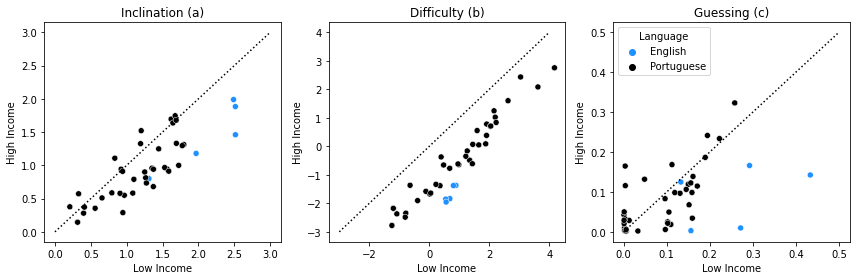

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

sns.scatterplot(data=par_income[par_income['Dffclt_low'].between(-5, 5)],
                x="Dscrmn_low", y="Dscrmn_high", hue="Language", ax=axs[0], legend=False,
                palette=['dodgerblue','black'])
axs[0].plot([0, 3], [0, 3], color='black', ls=':')
axs[0].set_xlabel('Low Income')
axs[0].set_ylabel('High Income')
axs[0].set_title("Inclination (a)")

sns.scatterplot(data=par_income[par_income['Dffclt_low'].between(-5, 5)],
                x="Dffclt_low", y="Dffclt_high", hue="Language", ax=axs[1], legend=False,
                palette=['dodgerblue','black'])
axs[1].plot([-3, 4], [-3, 4], color='black', ls=':')
axs[1].set_xlabel('Low Income')
axs[1].set_ylabel('High Income')
axs[1].set_title("Difficulty (b)")

sns.scatterplot(data=par_income[par_income['Dffclt_low'].between(-5, 5)],
                x="Gussng_low", y="Gussng_high", hue="Language", ax=axs[2],
                palette=['dodgerblue','black'])
axs[2].plot([0, 0.5], [0, 0.5], color='black', ls=':')
axs[2].set_xlabel('Low Income')
axs[2].set_ylabel('High Income')
axs[2].set_title("Guessing (c)")


plt.tight_layout()
plt.show()

### 2.2 By item area

In [28]:
hab_area_map = {'Communication Application':  [1,2,3,4],
               'Foreign Language':            [5,6,7,8], 
               'Corporal Language':           [9,10,11],
               'Art':                         [12,13,14],
               'Texts Interpretation':        [15,16,17],
               'Symbolic Systems':            [18,19,20],
               'Opinions':                    [21,22,23,24],
               'Portuguese Language':         [25,26,27],
               'Communication Technologies':  [28,29,30]
                }
area_hab_map = {}
for key in hab_area_map: 
    for item in hab_area_map[key]:
        area_hab_map[item] = key

par_income['CO_ITEM'] = par_income.index
par_income['CO_ITEM'] = par_income['CO_ITEM'].str.split().str[-1]

questoes_pd = pd.read_csv("../Data/Original/microdados_enem_"+ano+"/DADOS/ITENS_PROVA_"+ano+".csv")

for quest in list(par_income['CO_ITEM']):
    quest_cod = questoes_pd[questoes_pd['CO_ITEM']==int(quest)]['CO_HABILIDADE'].iloc[0]
    par_income.loc[par_income['CO_ITEM']==quest,'CO_HABILIDADE'] = quest_cod
    
par_income['Area'] = par_income['CO_HABILIDADE'].map(area_hab_map)

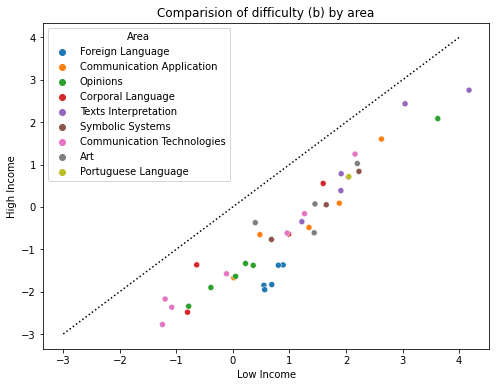

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=par_income[par_income['Dffclt_low'].between(-5, 5)],
                x="Dffclt_low", y="Dffclt_high", hue="Area")
plt.plot([-3, 4], [-3, 4], color='black', ls=':')
plt.xlabel('Low Income')
plt.ylabel('High Income')
plt.title("Comparision of difficulty (b) by area")
plt.show()

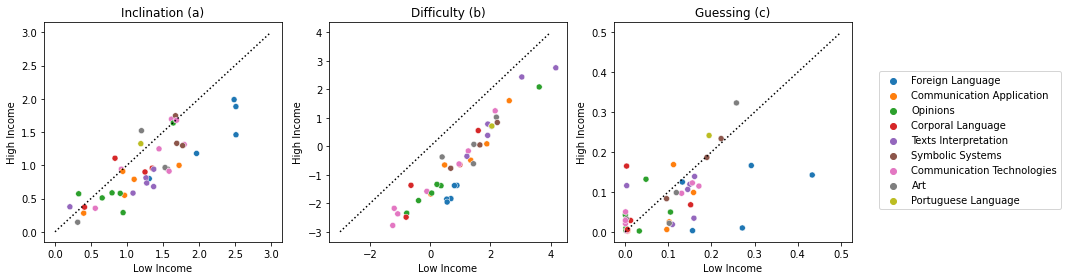

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))

sns.scatterplot(data=par_income[par_income['Dffclt_low'].between(-5, 5)],
                x="Dscrmn_low", y="Dscrmn_high", hue="Area", ax=axs[0], legend=False)
axs[0].plot([0, 3], [0, 3], color='black', ls=':')
axs[0].set_xlabel('Low Income')
axs[0].set_ylabel('High Income')
axs[0].set_title("Inclination (a)")

sns.scatterplot(data=par_income[par_income['Dffclt_low'].between(-5, 5)],
                x="Dffclt_low", y="Dffclt_high", hue="Area", ax=axs[1], legend=False)
axs[1].plot([-3, 4], [-3, 4], color='black', ls=':')
axs[1].set_xlabel('Low Income')
axs[1].set_ylabel('High Income')
axs[1].set_title("Difficulty (b)")


sns.scatterplot(data=par_income[par_income['Dffclt_low'].between(-5, 5)],
                x="Gussng_low", y="Gussng_high", hue="Area", ax=axs[2], legend=True)
axs[2].plot([0, 0.5], [0, 0.5], color='black', ls=':')
axs[2].set_xlabel('Low Income')
axs[2].set_ylabel('High Income')
axs[2].set_title("Guessing (c)")
axs[2].legend(loc='upper center', bbox_to_anchor = (1.5, 0.8))


plt.tight_layout()
plt.show()

In [32]:
df_gp_ing['alta']

,NU_INSCRICAO,NU_NOTA_LC,Item 55166,Item 54110,Item 23564,Item 31954,Item 118180,RangeLC
67,190001599147,549.9,1,1,1,0,0,"[530.0, 550.0)"
71,190001520694,573.4,1,1,1,1,0,"[570.0, 590.0)"
130,190001602646,569.6,1,1,1,1,1,"[550.0, 570.0)"
198,190001244962,544.2,1,1,0,1,0,"[530.0, 550.0)"
206,190001613167,327.5,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
1198786,190005939192,573.8,1,1,1,1,1,"[570.0, 590.0)"
1198852,190005906776,362.6,0,0,0,0,0,"[350.0, 370.0)"
1198880,190005913017,478.7,0,1,0,0,1,"[470.0, 490.0)"
1198982,190005943805,649.0,1,1,1,1,1,"[630.0, 650.0)"


In [33]:
df_que = df_gp_ing['alta'][['NU_NOTA_LC']].copy()

In [38]:
df_que['Acertos'] = df_gp_ing['alta'][item_ing].sum(axis=1)

<AxesSubplot:xlabel='Acertos', ylabel='NU_NOTA_LC'>

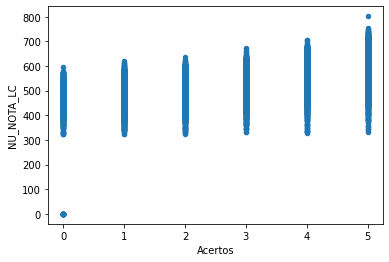

In [43]:
df_que.plot.scatter(x='Acertos', y='NU_NOTA_LC')

<AxesSubplot:xlabel='Acertos', ylabel='NU_NOTA_LC'>

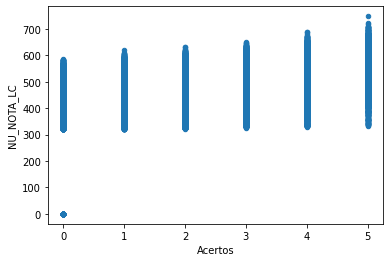

In [44]:
df_baixa = df_gp_ing['baixa'][['NU_NOTA_LC']].copy()
df_baixa['Acertos'] = df_gp_ing['baixa'][item_ing].sum(axis=1)

df_baixa.plot.scatter(x='Acertos', y='NU_NOTA_LC')

In [62]:
#df_grupo = df_grupo.set_index('NU_INSCRICAO')
df_gab = pd.read_csv("../Data/Processed/ENEM"+str(ano)+"/CR_data/CR_"+comp+".csv")
df_gab = df_gab.set_index('NU_INSCRICAO')
df_gab['CLASSE'] = df_grupo['CLASSE']
df_gab['Acertos'] = df_gab[df_gab.columns[2:-1]].sum(axis=1)
df_gab = df_gab.reset_index(drop=True)

In [75]:
df_gab

,NU_NOTA_LC,TP_LINGUA,Item 55166,Item 54110,Item 23564,Item 31954,Item 118180,Item 96705,Item 118222,Item 39016,...,Item 118028,Item 118246,Item 77356,Item 118276,Item 118299,Item 118165,Item 118103,Item 118192,CLASSE,Acertos
0,502.5,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,média,15
1,636.3,0,1,1,1,1,1,0,0,0,...,0,0,1,1,1,0,0,1,média,35
2,515.9,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,baixa,16
3,518.6,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,baixa,16
4,595.8,0,1,1,1,1,0,0,0,0,...,1,0,1,1,1,0,0,0,baixa,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199015,539.2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,média,19
1199016,518.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,média,18
1199017,545.7,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,média,19
1199018,506.7,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,1,baixa,15


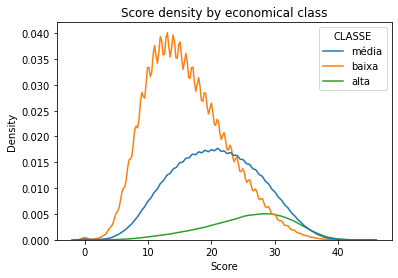

<Figure size 432x288 with 0 Axes>

In [87]:
fig = sns.kdeplot(data=df_gab, x="Acertos", hue="CLASSE")

plt.xlabel('Score')
plt.title('Score density by economical class')
#plt.legend(loc='upper left')
plt.show()
plt.savefig('ScoreDensity-LC2019.png')

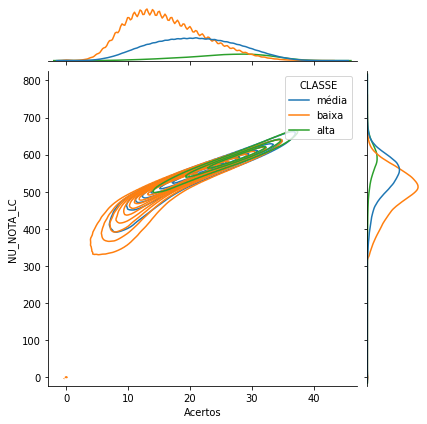

In [83]:
sns.jointplot(data=df_gab, x="Acertos", y="NU_NOTA_LC", hue="CLASSE", kind="kde")
plt.show()

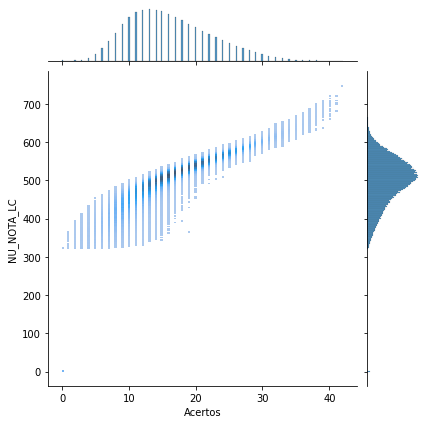

In [77]:
sns.jointplot(data=df_gab[df_gab['CLASSE']=='baixa'], x="Acertos", y="NU_NOTA_LC", kind='hist')
plt.show()